# Image Processing - Assignment 2 - "Morphological Filtering"
## by : Youssef Ahmed, Younan Nagy - section : 3

In [4]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Constructing Kernals

In [5]:
square_kernal=np.ones((10,10),np.uint8)
square_kernal3=np.ones((3,3),np.uint8)
square_kernal5=np.ones((5,5),np.uint8)
square_kernal8=np.ones((8,8),np.uint8)
circular_kernal=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
circular_kernal8=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))

# Dilation

### 1.

Result should be -> the Dilation will enlarge the white pixels i.e: en large the white square with the shape of the structuring element.

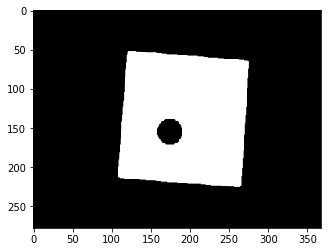

In [6]:
square_circle=cv2.imread('image2_folder\Square-circle.png')

plt.imshow(square_circle)

Square-circle.png

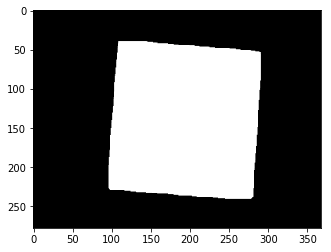

In [7]:
# square kernal (10,10)
dilation_square_circle= cv2.dilate(square_circle,square_kernal,iterations=3)
plt.imshow(dilation_square_circle)

square-circle-1.png
<h5>It's clear here that the shape of the white square edges take the shrap edge shape (structure element shape)</h5>

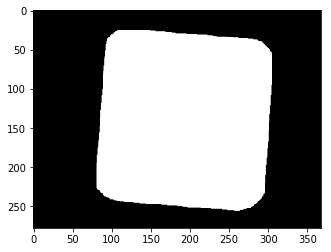

In [8]:
# Eliptical kenal(20,20) -> I assumed that it is circular
dilation_square_circle= cv2.dilate(square_circle,circular_kernal,iterations=3)
plt.imshow(dilation_square_circle)

square-circle-2.png
<h5>It's clear here that the shape of the white square edges take the round edge shape (structure element shape)</h5>

###  2.

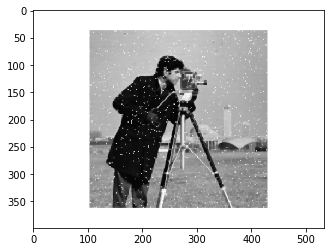

In [9]:
Camera_man=cv2.imread('image2_folder\Cameraman.png')
dilation_Camera_man= cv2.dilate(Camera_man,square_kernal3,iterations=1)
erode_Camera_man= cv2.erode(dilation_Camera_man,square_kernal3,iterations=1)
plt.imshow(erode_Camera_man)

 cameraman-denoised.png

<h3>3.</h3>

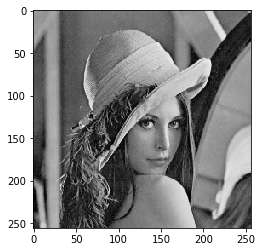

In [10]:
Lady=cv2.imread('image2_folder\lady.png')
plt.imshow(Lady)

lady.png

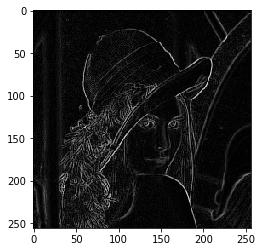

In [11]:
#We will dilate to enlarge the white pixels then subtract the original image to get the edges
dilation_Lady= cv2.dilate(Lady,square_kernal3,iterations=1)
Lady_edge=dilation_Lady-Lady
plt.imshow(Lady_edge)

lady-edge.png

<h1>Erosion</h1>
<h3>4.</h3>

Result should be -> the erosion will small the white pixels i.e: en large the hole and dark pixels with the shape of the structuring element.

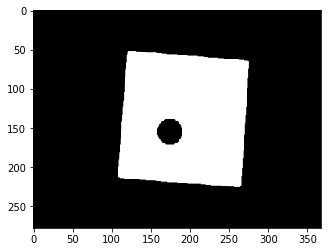

In [12]:
img4 = cv2.imread('image2_folder\Square-Circle.png',1)
plt.imshow(img4)

Square-Circle.png

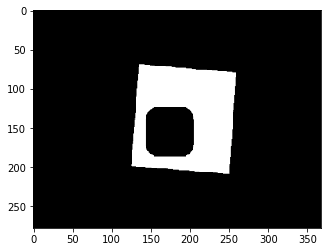

In [13]:
kernel_square = np.ones((7,7),np.uint8)
erosion_square = cv2.erode(img4,kernel_square,iterations = 5)
plt.imshow(erosion_square)


 circle-square-erode-1.png
<h5>It's clear here that the shape of the black hole take the rectangle shape (structure element shape) with smoothed edges because of the nature of the original image (circle)</h5>

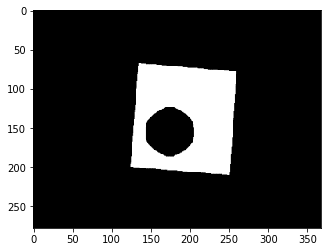

In [14]:
kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
erosion_circle = cv2.erode(img4,kernel_circle,iterations = 5)
plt.imshow(erosion_circle)

 circle-square-erode-2.png
<h5>It's clear here that the shape of the black hole take the nearlly circular or ellipse shape (structure element shape)</h5>

<h3>5.</h3>

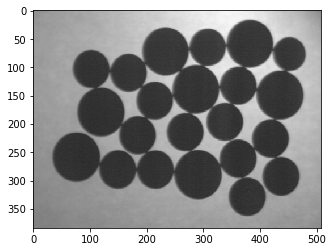

In [15]:
img5 = cv2.imread('image2_folder\Circle.png',1)
plt.imshow(img5)

Circle.png

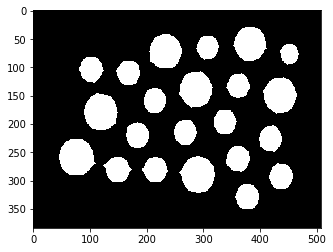

In [16]:
 _ ,threshold_img = cv2.threshold(img5,127,255,cv2.THRESH_BINARY_INV)
circle_erode = cv2.erode(threshold_img,kernel_circle,iterations = 4)
plt.imshow(circle_erode)

circle-erode.png

<h3>Another solution</h3>

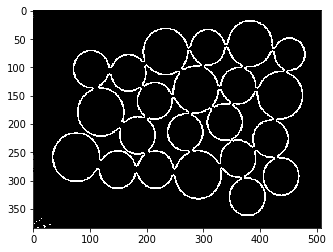

In [17]:
 _ ,threshold_img = cv2.threshold(img5,127,255,cv2.THRESH_BINARY_INV)
circle_erode = cv2.erode(threshold_img,kernel_circle,iterations =1)
edges = threshold_img - circle_erode 
plt.imshow(edges)

circle-erode.png

<h3>6.</h3>

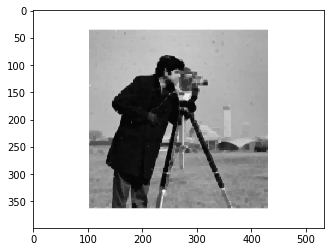

In [18]:
erosion_Camera_man= cv2.erode(dilation_Camera_man,square_kernal5,iterations=1)
plt.imshow(erosion_Camera_man)

 erode.png <br>
 Observation : dilation and erosion can remove salt and pepper noise easly but it may affect the image quality bad

The salt noise (white pixels) only will be removed because the elosion process reomves the white elements less than the size of the structure element, and in the same time it will enlarge the pepper noise (black pixels) so we dilate the image again to reverse this operation and once element is removed it can't be back. 

### 7.

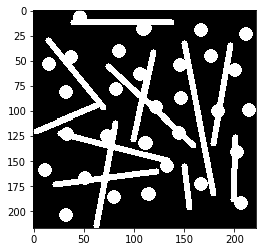

In [19]:
Circle_and_Lines=cv2.imread('image2_folder\Circle_and_Lines.png',0)
plt.imshow(cv2.cvtColor(Circle_and_Lines, cv2.COLOR_BGR2RGB))

 Circle_and_Lines.png

number of circles =  32


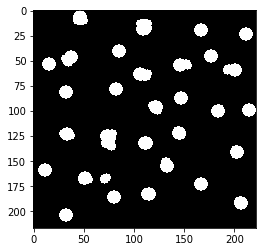

In [20]:

circles=cv2.morphologyEx(Circle_and_Lines,cv2.MORPH_OPEN,circular_kernal8)#square_kernal8


ret,circles_binary = cv2.threshold(circles,127,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(circles_binary, cv2.COLOR_BGR2RGB))
n,k= cv2.connectedComponents(circles_binary)
print("number of circles = ",n)

circle_png

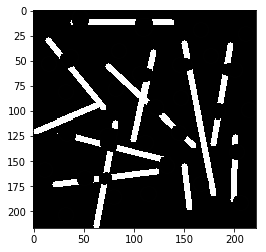

In [21]:
lines=Circle_and_Lines-cv2.dilate(circles_binary,square_kernal3,iterations=1)
plt.imshow(cv2.cvtColor(lines, cv2.COLOR_BGR2RGB))

line_png

In [22]:
square_kernal20=np.ones((16,15),np.uint8)
completed_lines=cv2.morphologyEx(lines,cv2.MORPH_CLOSE,square_kernal20)#square_kernal8
ret,completed_lines = cv2.threshold(completed_lines,127,255,cv2.THRESH_BINARY)

n,k= cv2.connectedComponents(completed_lines)
print("number of lines",n)


number of lines 13


<h3>12.</h3> 

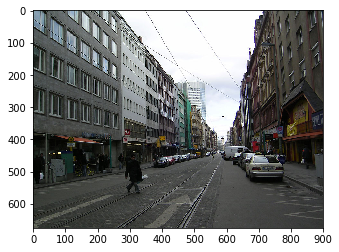

In [23]:
morning = cv2.imread('image2_folder\morning.jpg',1)
morning_rgb = cv2.cvtColor(morning, cv2.COLOR_BGR2RGB)
plt.imshow(morning_rgb)

morning.jpg

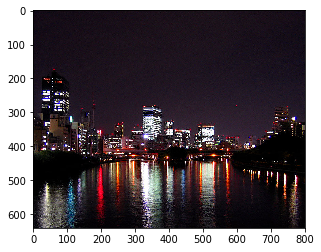

In [24]:
evening = cv2.imread('image2_folder\evening.jpg',1)
evening_rgb = cv2.cvtColor(evening, cv2.COLOR_BGR2RGB)
plt.imshow(evening_rgb)

evening.jpg

<h2>Pipeline 1. Get the sky Mask </h2>
    <h3>     1.1 Transform to gray scale </h3>

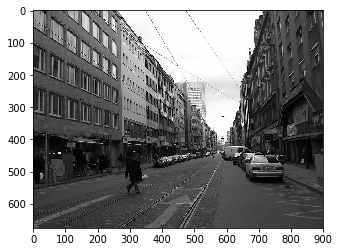

In [26]:
grey_morning = cv2.cvtColor(morning, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_morning,cmap='gray')

<h3>1.2 Apply Threshold<h3>

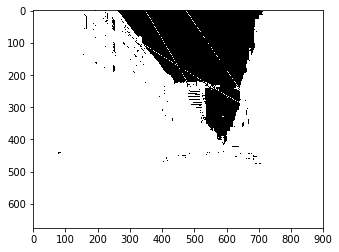

In [27]:
_ ,threshold_morning = cv2.threshold(grey_morning,220,255,cv2.THRESH_BINARY_INV)
plt.imshow(threshold_morning,cmap='gray')

<h3>1.3 Opening and closing to remove noise and get the exact shape<h3>

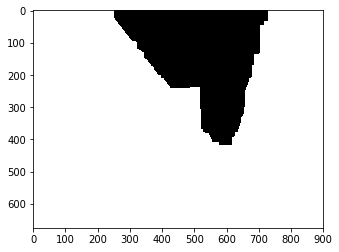

In [28]:
kernel_square = np.ones((9,9),np.uint8)

# First closing to remove black noise
morning1 = cv2.dilate(threshold_morning,kernel_square,iterations = 1)
morning2 = cv2.erode(morning1,kernel_square,iterations = 3)

# Second opening to remove white noise
morning3 = cv2.erode(morning2,kernel_square,iterations = 2)
plt.imshow(morning3,cmap='gray')

<h2>Pipeline 2. Remove the sky from the morning image </h2>

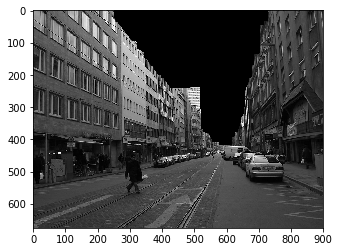

In [29]:
no_sky_morning = cv2.bitwise_and(morning3,grey_morning)
plt.imshow(no_sky_morning,cmap='gray')

<h2>Pipeline 3. Get the sky color from the evening </h2>
    <h3>     3.1 Inverse the mask</h3>

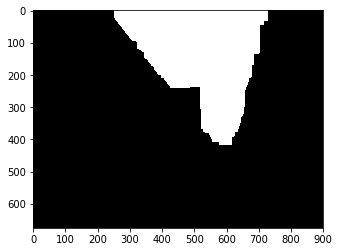

In [30]:
mask = cv2.bitwise_not(morning3)
plt.imshow(mask,cmap='gray')

<h3>     3.2 Shift the mask (to go away from buildings as possible in the evining.jpg as we only wanted the sky)</h3>

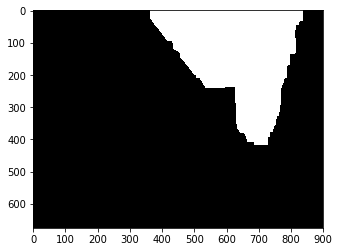

In [38]:
mask_height = mask.shape[0]
mask_width = mask.shape[1]

M = np.float32([[1,0,110],[0,1,0]])
new_mask = cv2.warpAffine(mask,M,(mask_width,mask_height))
plt.imshow(new_mask,cmap='gray')

<h3>     3.3 Mask the three channel of the RGB with the new sky Mask</h3>

In [40]:

evening = cv2.resize(evening,(mask_width,mask_height))

blue  = evening[:, :, 0]
green = evening[:, :, 1]
red   = evening[:, :, 2]

evening_sky = cv2.merge((red,green,blue))


blue_sky = cv2.bitwise_and(blue,new_mask)
green_sky = cv2.bitwise_and(green,new_mask)
red_sky = cv2.bitwise_and(red,new_mask)

evening_sky = cv2.merge((red_sky,green_sky,blue_sky))

<h3>     3.4 Back the mask to the original position </h3>

In [41]:
M = np.float32([[1,0,-110],[0,1,0]])
new_mask = cv2.warpAffine(evening_sky,M,(mask_width,mask_height))

<h2>Pipeline 4. Add the sky with the image  </h2>

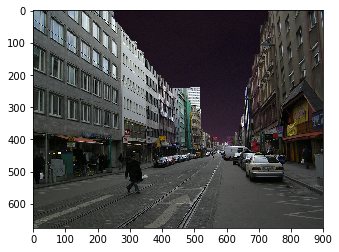

In [42]:

blue  = morning[:, :, 0]
green = morning[:, :, 1]
red   = morning[:, :, 2]


blue_sky = cv2.bitwise_and(blue,morning3)
green_sky = cv2.bitwise_and(green,morning3)
red_sky = cv2.bitwise_and(red,morning3)

without_sky = cv2.merge((red_sky,green_sky,blue_sky))
plt.imshow(without_sky)

final_output = without_sky + new_mask
plt.imshow(final_output)

<h3>13.</h3>

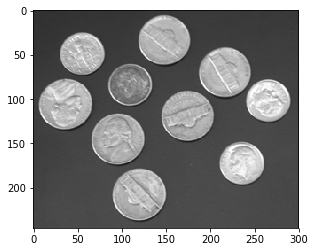

In [76]:

square_kernal20=np.ones((15,15),np.uint8)
Coins=cv2.imread('image2_folder\coins.png',1)
plt.imshow(Coins)

coins_color.jpeg

Value =  400


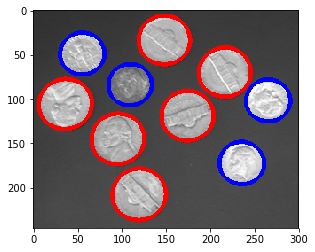

In [97]:
square_kernal20=np.ones((15,15),np.uint8)
Coins=cv2.imread('image2_folder\coins.png',1)
Coins_gray = cv2.cvtColor(Coins,cv2.COLOR_BGR2GRAY)
ret,coins_binary = cv2.threshold(Coins_gray,85,255,cv2.THRESH_BINARY)
coins_binary_opened=cv2.morphologyEx(coins_binary,cv2.MORPH_OPEN,square_kernal3)#square_kernal8

contours, hierarchy = cv2.findContours(coins_binary_opened, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

value = 0
for (i,c) in enumerate(contours):
    area = cv2.contourArea(c)
    if area < 50:
        continue
    elif area > 0 and area < 2500:
        value = value + 25
        Coins = cv2.drawContours(Coins, contours, i, (255,0,0), 3)
    else:
        value = value + 50
        Coins = cv2.drawContours(Coins, contours, i, (0,0,255), 3)
#cv2.drawContours(Coins, contours, -1, (3,0,0), 3)

print('Value = ' , value )


plt.imshow(cv2.cvtColor(Coins, cv2.COLOR_BGR2RGB))